In [1]:
from scripts.Rocket import Buch, Magazin, Tageszeitung

In [2]:
b1 = Buch('Lord of the Rings', 'J.R.R. Tolkin' , 531, 7.99)
b2 = Buch('The two towers', 'J.R.R. Tolkin' , 456, 6.99)
N1 = Tageszeitung('Die Zeit', 'Verlag1', 'daily',2.33)
M2 = Magazin('Science', 'Verlag2', 'monthly', 5.66 )


In [3]:
print(b1.titel,': ',b1.preis)

Lord of the Rings :  7.99


In [4]:
print(N1.titel,': ',N1.preis)

Die Zeit :  2.33


In [ ]:
m1 = M(1,"cm")
m2 = M(2,"m")

In [ ]:
m3= m1+m2

In [ ]:
print(m3)

In [ ]:
d = Ding("Eisen",20)

In [ ]:
d.masse()

In [ ]:
d.volumen

In [ ]:
d.stoff

In [ ]:
p = Privat()

In [ ]:
print(isinstance(d, Ding))

In [ ]:
print(isinstance(m1, Ding))

In [ ]:
print(isinstance(m1, object))

In [ ]:
p.oeffentlich


In [ ]:
p._privat


In [ ]:
p._Privat__ganzprivat

In [ ]:
whos

In [ ]:
import numpy as np
#import scipy
#import matplotlib.pyplot as plt
#import pandas as pd
#import rasterio

In [ ]:
import numpy as np
import pandas as pd

# eleganter Weg mit dem 
data=pd.read_csv('data/3D-files/masspoints.xyz',header=None, delim_whitespace=True)

print(data)              # Alle Daten ausgeben
print(data[0])          # erste Spalte ausgeben

print( data[0:5])
print( data.shape)
test=data[0:5][0]
print( test[0].dtype)

import k3d

k3d.points(data)

In [ ]:
2**3

In [ ]:
ra = 6378.1370  #Earth Radius at sea level at equator in [km]
rp = 6356.7520  #EarthRadius at poles in [km]
rm = 6371.0088  #Mean Radius of Earth in in [km]

phi=52*np.pi/180
lam=13*np.pi/180
print(np.pi, phi, lam)
print(100*'=')

#calculate metric koordinate parameters

yq = rm*lam
zq = rm*np.arctanh(np.sin(phi))
print(yq, zq)
print(100*'=')

#calc Area of geodetic square

F= (rm**2)*(np.arctan( np.tanh(zq/rm) * np.tan(yq/rm)  ))
print(F)


In [ ]:
import k3d
plot = k3d.plot()


vertices = [[0, 0, 0], [0, 0, 1], [1, 0, 0]]
indices = [[0, 1, 2]]

mesh = k3d.mesh(vertices, indices)

plot += mesh

plot.display()

In [ ]:
import k3d

k3d.points([0, 0, 0])

In [ ]:
%%file mpitest.py

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    data = [1.0, 2.0, 3.0, 4.0]
    comm.send(data, dest=1, tag=11)
elif rank == 1:
    data = comm.recv(source=0, tag=11)
    
print("rank =", rank, ", data =", data)



In [ ]:
!/Users/richter/anaconda3/bin/mpirun -n 2 python mpitest.py

In [ ]:
!type mpirun

In [ ]:
%%file mpi-psum.py

from mpi4py import MPI
import numpy as np

def psum(a):
    r = MPI.COMM_WORLD.Get_rank()
    size = MPI.COMM_WORLD.Get_size()
    m = len(a) / size
    locsum = np.sum(a[r*m:(r+1)*m])
    rcvBuf = np.array(0.0, 'd')
    MPI.COMM_WORLD.Allreduce([locsum, MPI.DOUBLE], [rcvBuf, MPI.DOUBLE], op=MPI.SUM)
    return rcvBuf

a = np.load("random-vector.npy")
s = psum(a)

if MPI.COMM_WORLD.Get_rank() == 0:
    print("sum =", s, ", numpy sum =", a.sum())

In [ ]:
!mpirun -n 2 python mpi-psum.py

source: https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-6B-HPC.ipynb

In [ ]:
import multiprocessing

N_core = multiprocessing.cpu_count()

print("This system has %d cores" % N_core)



In [ ]:
def getpid():
    """ return the unique ID of the current process """
    import os
    return os.getpid()

In [ ]:
getpid()

In [ ]:
arr

In [ ]:
arr.dtype

In [ ]:
import osr

srs = osr.SpatialReference()
srs.ImportFromEPSG(25833)
print(srs)

In [ ]:
print(srs.ExportToWkt())

In [ ]:



import numpy as np
import scipy as sp

In [ ]:
from osgeo import gdal

In [ ]:
import rasterio

In [ ]:
import matplotlib

In [ ]:
import seaborn as scn

In [ ]:
import geopandas as gpd

In [ ]:
import shapefile

In [ ]:
r=shapefile.Reader("data/berlin-latest/Bezirke__Berlin.shp")

r

In [ ]:
r.bbox

In [ ]:
r.numRecords

In [ ]:
r.fields

In [ ]:
[item[1] for item in r.fields[1:]]

In [ ]:
geom=r.shape(0).  
print(len(r.shape(11).points) )

In [ ]:
geom.shapeTypeName


Plotten des Shape files geht nicht, wie muss man das machen bei der shapefile lib

https://stackoverflow.com/questions/30447790/displaying-a-shapefile

In [ ]:
import numpy as np

In [ ]:
data=np.loadtxt("data/3D-files/masspoints.xyz")

In [ ]:
data.dtype

In [ ]:
data.shape

In [ ]:
data[0:10,:]

In [ ]:
dataDEM=np.loadtxt("data/dem/dem.asc",skiprows=6)

In [ ]:
dataDEM.shape

In [ ]:
dataDEM.dtype

In [ ]:
import matplotlib.pyplot as plt      # plot library


In [ ]:
plt.imshow(dataDEM)

In [ ]:

from owslib.wms import WebMapService
#wms = WebMapService('http://geoserv.weichand.de:8080/geoserver/wms')


wms = WebMapService('https://neowms.sci.gsfc.nasa.gov/wms/wms')
print("Title: ", wms.identification.title)
print("Type: ", wms.identification.type)
print("Operations: ", [op.name for op in wms.operations])
print("GetMap options: ", wms.getOperationByName('GetMap').formatOptions)

for key in wms.contents.keys():
    print(key)

In [ ]:
from owslib.wfs import WebFeatureService
wfs11 = WebFeatureService(url='http://geoserv.weichand.de:8080/geoserver/wfs', version='1.1.0')
print(wfs11.identification.title)

In [ ]:
list(wfs11.contents)

https://ouranosinc.github.io/pavics-sdi/tutorials/owslib_intro.html
    

In [108]:
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt

data/SpatialBaseData/elevation
EPSG:32145
r
| 30.00, 0.00, 471090.08|
| 0.00,-30.00, 231352.35|
| 0.00, 0.00, 1.00|
(767, 786)


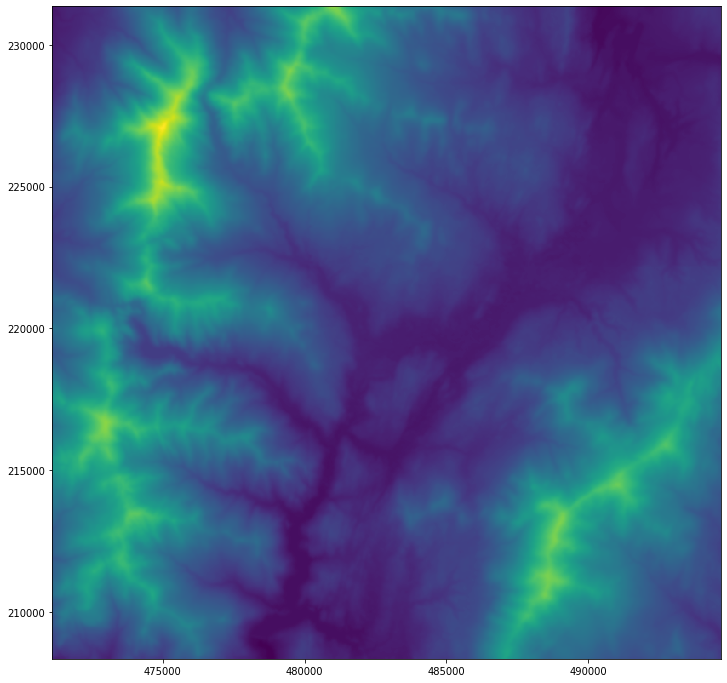

In [109]:
DEMdata=rasterio.open('data/SpatialBaseData/elevation')
print(DEMdata.name)
print(DEMdata.crs)
print(DEMdata.mode)
print(DEMdata.transform)
print(DEMdata.shape)
#ulx=DEMdata.transform[2]
#uly=DEMdata.transform[5]
fig, ax = plt.subplots(figsize=(16,12))

rasterio.plot.show(DEMdata, ax=ax)

In [37]:
print(DEMdata.transform[0:15])

print(DEMdata.width)
print(DEMdata.height)

print(DEMdata.transform*(DEMdata.width, DEMdata.height))
print(DEMdata.bounds)

(30.0, 0.0, 471090.08257249475, 0.0, -30.0, 231352.35339681862, 0.0, 0.0, 1.0)
786
767
(494670.08257249475, 208342.35339681862)
BoundingBox(left=471090.08257249475, bottom=208342.35339681862, right=494670.08257249475, top=231352.35339681862)


In [114]:
idxsX=[list((i,0)) for i in range(0,10)]
print(idxsX)

X=np.array([list(DEMdata.transform*pX) for pX in idxsX])[:,0]
#n=5
idxsY=[list((0,i)) for i in range(0,10)]
print(idxsY)

Y=np.array([list(DEMdata.transform*pY) for pY in idxsY])[:,1]

for Xi in X: print(Xi)

for Yi in Y: print(Yi)

[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0]]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9]]
471090.08257249475
471120.08257249475
471150.08257249475
471180.08257249475
471210.08257249475
471240.08257249475
471270.08257249475
471300.08257249475
471330.08257249475
471360.08257249475
231352.35339681862
231322.35339681862
231292.35339681862
231262.35339681862
231232.35339681862
231202.35339681862
231172.35339681862
231142.35339681862
231112.35339681862
231082.35339681862


In [116]:
print(DEMdata.transform*(0,0))
print(DEMdata.transform*(0,1))
print(DEMdata.transform*(0,2))
print(DEMdata.transform*(0,3))

(471090.08257249475, 231352.35339681862)
(471090.08257249475, 231322.35339681862)
(471090.08257249475, 231292.35339681862)
(471090.08257249475, 231262.35339681862)
